# Lista 4 - Métodos de Monte Carlo I



Caio Vítor de S. Soares

Março, 2021

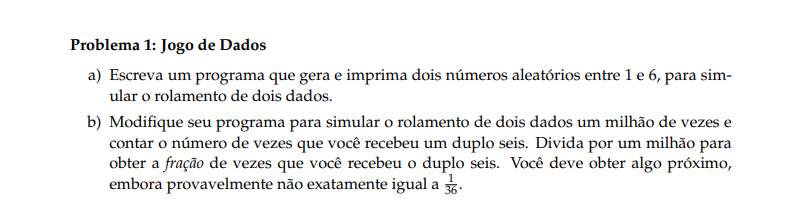

In [1]:
from random import randrange

d = randrange(1,7)
print("dado:",d)
#--------------------------
c=0
f = 1/36
for i in range(1000000):
    d1 = randrange(1,7)
    d2 = randrange(1,7)
    if d1 == 6 and d2 == 6:
        c+=1
print("Nº de duplos 6:",c/1000000,"\n 1/36=",f)    

dado: 6
Nº de duplos 6: 0.027696 
 1/36= 0.027777777777777776


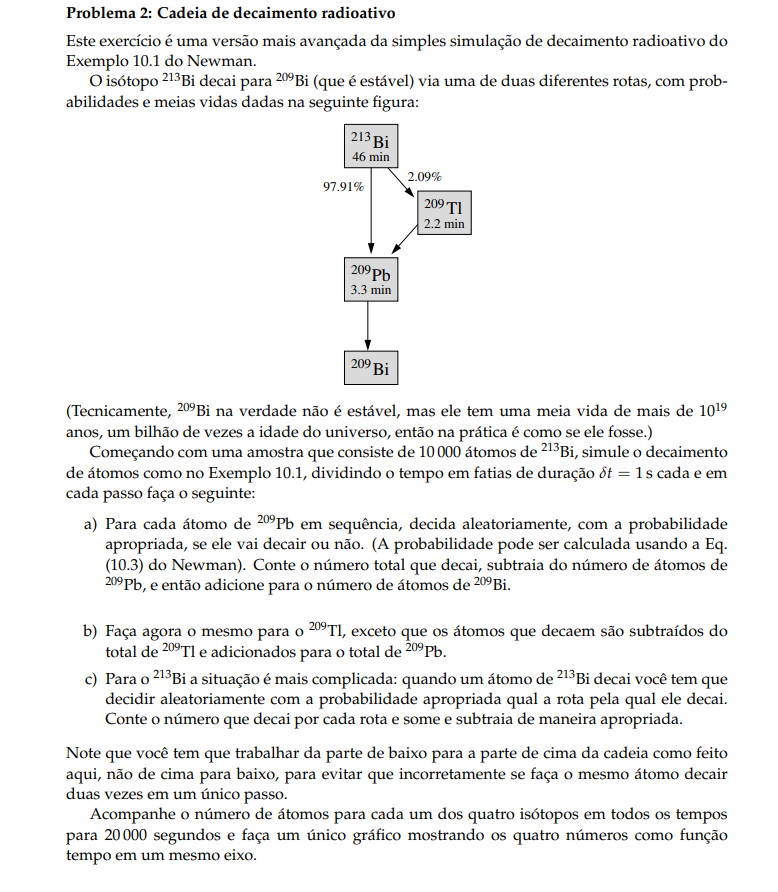

Seja N o número atual de átomos, essa quantidade decai exponencialmente da seguinte forma:

 ##  $$ N(t) = N(0)2^ {-\frac{t}{\tau}}$$

e a probabiliade $p$ de um átomo ter decaído é:

##    $$p(t) = \frac{N(t)}{N(0)} = 1 - 2^ {-\frac{t}{\tau}}$$


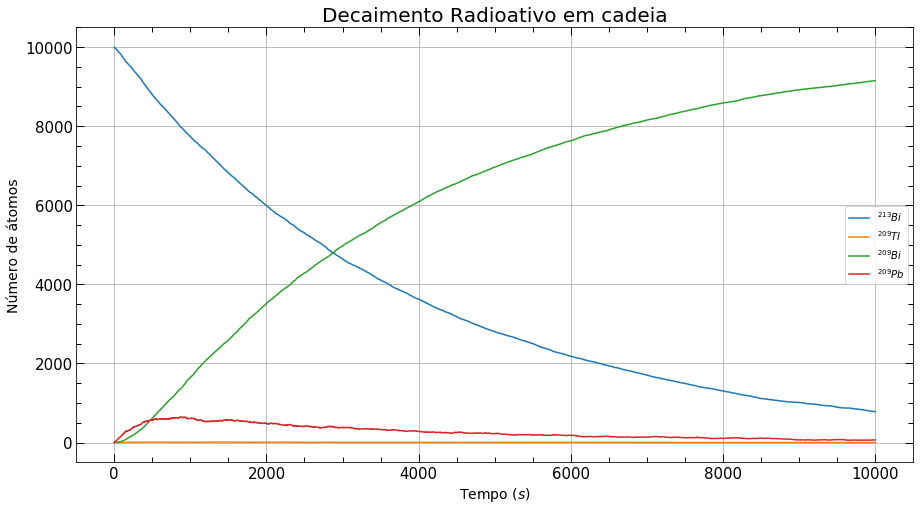

In [4]:
from random import random,seed
from numpy import arange
import matplotlib.pyplot as plt

seed(22)

NBi = 10000
Nbi = 0
NTl = 0
NPb = 0
h = 1
tmax = 10000
def p(tau):
    return 1 - 2**(-h/tau)
tpoints = arange(0,tmax,h)
Tlpoints = []
Pbpoints = []
Bipoints = []
bipoints = []

for t in tpoints:
    Tlpoints.append(NTl)
    Bipoints.append(NBi)
    bipoints.append(Nbi)
    Pbpoints.append(NPb)
    
    decay1 = 0
    for i in range(NPb):
        if random()<p(3.3*60):
            decay1 +=1
    NPb-=decay1
    Nbi+=decay1
    
    decay2 = 0
    for i in range(NTl):
        if random()<p(2.2*60):
            decay2+=1
    NTl-=decay2
    NPb+=decay2
    
    decay3,decay4 = 0,0
    for i in range(NBi):
        if random()<p(46*60):
            if random()<0.0209:
                decay3+=1
            else:
                decay4+=1
    NBi-=decay3+decay4
    NTl+=decay3
    NPb+=decay4

    
def opt_plot():#cortesia de Gabriel Wendell
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

    
fig = plt.figure(figsize=(15,8))
plt.title("Decaimento Radioativo em cadeia",fontsize = 20)
plt.plot(tpoints,Bipoints,label="$^{213} Bi$")
plt.plot(tpoints,Tlpoints,label="$^{209} Tl$")
plt.plot(tpoints,bipoints,label="$^{209} Bi$")
plt.plot(tpoints,Pbpoints,label="$^{209} Pb$")
plt.xlabel("Tempo $(s)$",fontsize = 14)
plt.ylabel("Número de átomos",fontsize = 14)
plt.grid()
plt.legend()
opt_plot()
plt.show()

        


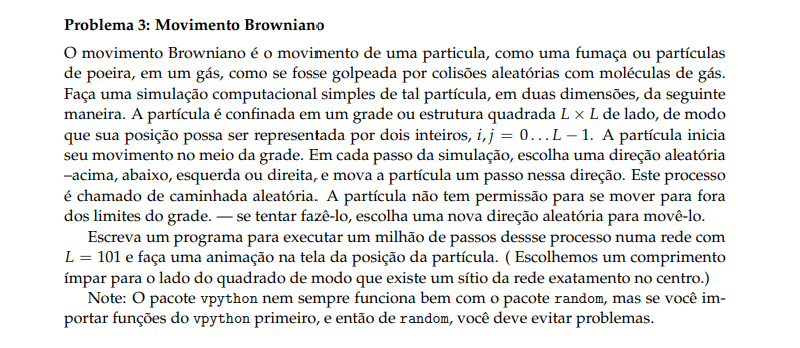

In [19]:
import matplotlib.animation as animation

L = 101
y = []
x = []
i = 50
j = 50
y.append(j)
x.append(i)
for t in range(100000):
    p=randrange(1,5)
    if p == 1:
        i-=1
    if p == 2:
        i+=1
    if p == 3:
        j-=1
    if p == 4:
        j+=1
    if i <=100 and j<=100 and i>=1 and j>=1:
        x.append(i)
        y.append(j)

ts = 100
#fig, ax = plt.subplots()
r, = ax.plot([], [],'ro')

def init():
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)

def walk(t):
    global x,y
    r.set_data(x[t],y[t])       
    return r,

#ani = animation.FuncAnimation(fig, walk, arange(1, ts), interval=100, init_func=init)
#plt.show()
#ani.save('brm.mp4')

![brm](https://media.giphy.com/media/YM5KKfewRmSqGNjgJA/giphy.gif "brm")

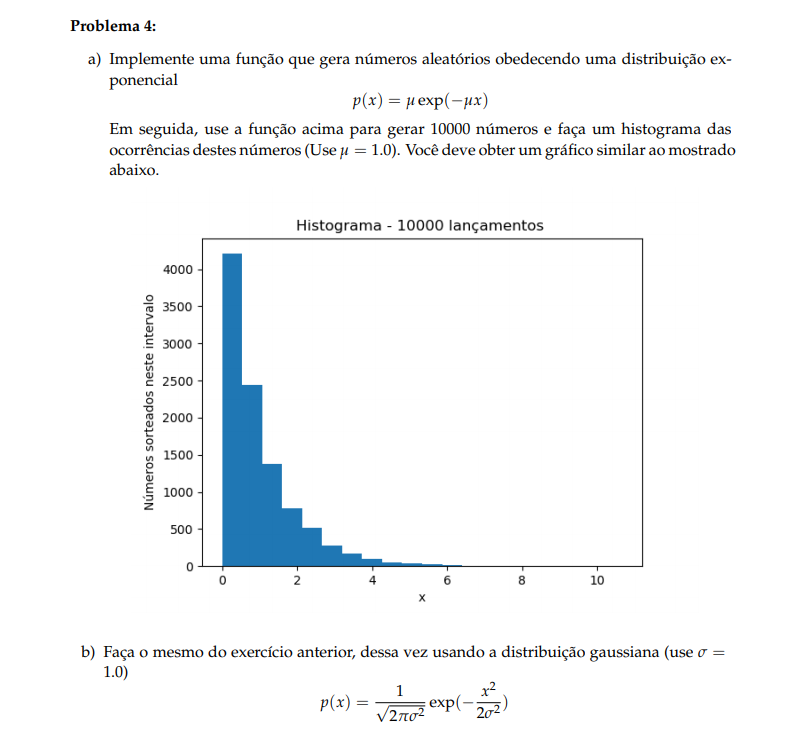

Podemos calcular um número x aleatório dada a distribuição exponencial por:
    \begin{equation}
    x = -\frac{1}{\mu}\ln{(1 - z)}
    \end{equation}
    
e para uma distribuição gaussiana, temos:
    \begin{equation}
    r = \sqrt{-2\sigma^2 \ln{(1-z)}}
    \end{equation}
tal que:
    \begin{equation}
    x = r \cos{\theta}
    \end{equation}
    \begin{equation}
    y = r \sin{\theta}
    \end{equation}
são os números aleatórios.
    

    

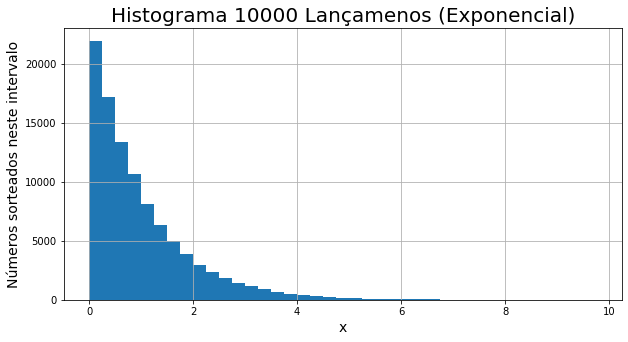

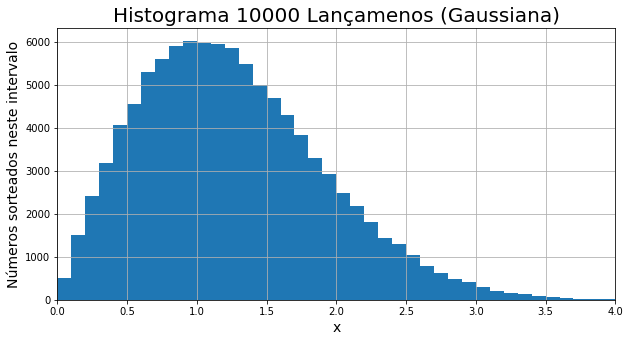

In [115]:
from math import log,cos,sin,sqrt,pi

sigma = 1
mu = 1
exp = []
gauss = []
for i in range(100000):
    z = random()
    theta = 2*pi*random()
    r = sqrt(-2*sigma*sigma*log(1-z))
    x1 = -(1/mu)*log(1-z)
    x = r*cos(theta)
    y = r*sin(theta)
    x2 = sqrt(y*y + x*x)
    exp.append(x1)
    gauss.append(x2)
    
    
b1 = arange(0,10,0.25)
b2 = arange(0,10,0.1)
fig = plt.figure(figsize=(10,5))
plt.title("Histograma 10000 Lançamenos (Exponencial)",fontsize = 20)
plt.hist(exp,bins=b1)
plt.xlabel("x",fontsize = 14)
plt.ylabel("Números sorteados neste intervalo",fontsize = 14)
plt.grid()
plt.show()

fig = plt.figure(figsize=(10,5))
plt.title("Histograma 10000 Lançamenos (Gaussiana)",fontsize = 20)
plt.hist(gauss,bins=b2)
plt.xlabel("x",fontsize = 14)
plt.xlim(0,4)
plt.ylabel("Números sorteados neste intervalo",fontsize = 14)
plt.grid()
plt.show()


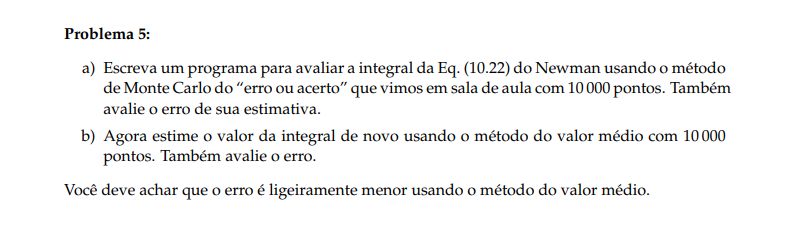

# $$ I = \int{\sin^2{ \bigg[ \frac{1}{x(2-x)}} \bigg] }dx $$

1.4466
1990


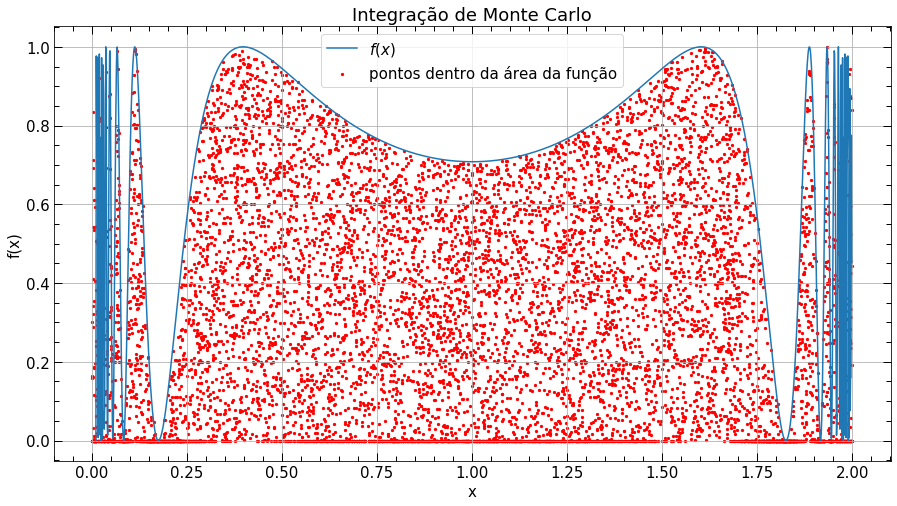

In [97]:

A = 2

XX = arange(0.01,2,0.001)
F = []
Y = []
X = []
def f(x):
    return(sin(1/(x*(2-x))))**2

N = 10000
count = 0
for i in range(N):
    x = A*random()
    y = random()
    
    X.append(x)
    if y<f(x):
        count+=1
        Y.append(y)
    else:
        Y.append(0)
I = A*count/N
print(I)


a = len(XX)
print(a)
for j in range(a):
    xx = XX[j]
    F.append(f(xx))
fig = plt.figure(figsize = (15,8))
plt.title("Integração de Monte Carlo",fontsize = 18)
plt.scatter(X,Y,color='r',s=5,label="pontos dentro da área da função")
plt.plot(XX,F,label="$f(x)$")
plt.xlabel("x",fontsize = 15)
plt.ylabel("f(x)",fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()
opt_plot()
plt.show()

Podemos Avaliar o erro do valor da integral (I) por:
    
    
## $$ \sigma = \frac{\sqrt{I(A-I)}}{\sqrt{N}} $$

In [108]:
#erro do método "hit-or-miss":
sigma = sqrt(I*(A-I))/sqrt(N)
print("erro do método 'hit-or-miss'=",sigma)

erro do método 'hit-or-miss'= 0.008931916161325892


In [110]:
#método do valor médio:
S = []
SS = []
b=2
a=0
for i in range(N):
    xi = b*random()
    S.append(f(xi))
    SS.append(f(xi)*(f(xi)))
    
s=sum(S)
ss=sum(SS)
I = s*((b-a)/N)
print(I)

1.455660192228567


O erro nesse método pode ser calculado por:
## $$\sigma = \frac{b-a}{N} \sqrt{N var f}$$

tal que:
## $$ var f = \langle f^2 \rangle - \langle f \rangle^2 $$
## $$ \langle f \rangle = \frac{1}{N}\sum_{i=1}^{N}f(x_i) $$
## $$ \langle f^2 \rangle = \frac{1}{N}\sum_{i=1}^{N}[f(x_i)]^2$$

In [113]:
varf = ss/N - (s/N)**2
sigma = ((b-a)/N)*sqrt(N*varf)
print("erro do método do valor médio =",sigma)

erro do método do valor médio = 0.005263107372347693


### Referências:
[1] Mark Newman-Computational Physics (2013,University of Michigan) 